In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', encoding='utf-8')
df['sentiment'].replace({'positive':1, 'negative':0}, inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

blue = '#5DADE2'
green = '#52BE80'
red = '#EC7063'
def get_review_len_hist(fig_size = (10,6), _class=None, color=blue):
    f, ax = plt.subplots(figsize = fig_size)
    if str(_class) == 'None':
        review_len = df['review'].str.len()
        ax.set_title('review length')
        ax.hist(review_len, color=color)
    else:
        review_len=df[df['sentiment'] == _class]['review'].str.len()
        ax.set_title(f'{_class} review length')
        ax.hist(review_len,color=color)
    return ax

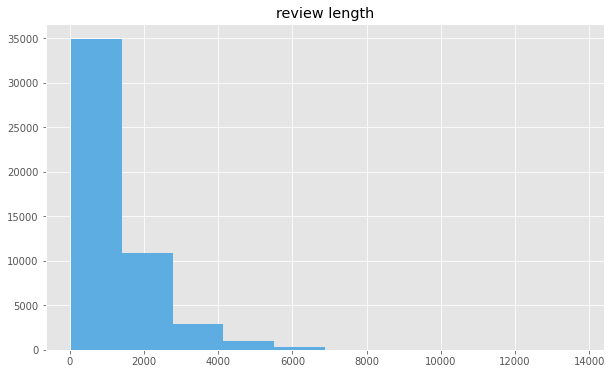

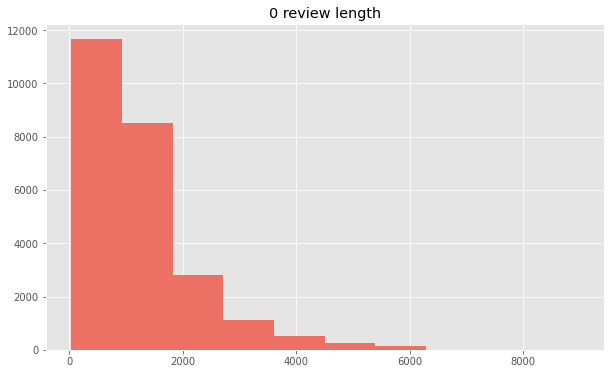

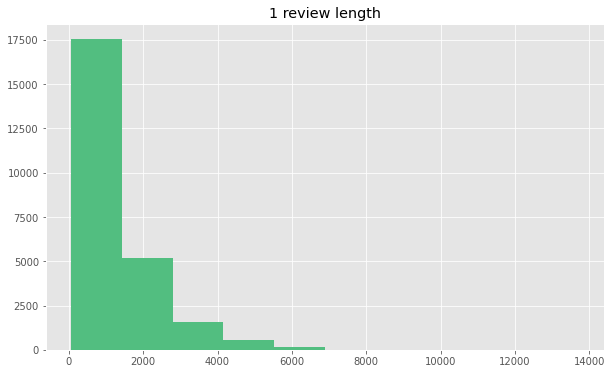

In [ ]:
ax1 = get_review_len_hist()
ax2 = get_review_len_hist(_class=0, color=red)
ax3 = get_review_len_hist(_class=1, color=green)

In [ ]:
X = df['review']
y = df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

vocab_size = 50000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'so': 36,
 'who': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'out': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'there': 47,
 'some': 48,
 'what': 49,
 'good': 50,
 'more': 51,
 'when': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'she': 60,
 'which': 61,
 'only': 62,
 'really': 63,
 'see': 64,
 'story': 65,
 'their': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'we': 72,
 'much': 73,
 'than': 74,
 'bad': 75,
 'been': 76,
 'will': 77,
 'get': 78,
 'do': 79,
 'other': 80,
 'also': 81,
 'great': 82,
 '

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = 300
padding_type='post'
truncation_type='post'

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)

In [ ]:
#Download the Glove word embeddings and append to a dictionary
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2022-10-09 15:29:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-09 15:29:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-09 15:29:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’


In [ ]:
import os
import zipfile
#Extract Glove word embeddings to a temp folder
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [ ]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.300d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, max_length))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
      # words not found in embedding index will be all-zeros.
      embedding_matrix[i] = embedding_vector

In [ ]:
print(num_words)

112241


In [ ]:
embeddings_index.get("character")

array([-2.5760e-01,  1.2072e-01,  1.3103e-01, -5.2371e-01, -2.1731e-02,
        3.1327e-01, -5.0005e-01,  4.9443e-02,  1.3046e-02, -1.4395e+00,
        1.5403e-01, -3.4951e-01, -2.0304e-01, -4.3382e-02, -2.8953e-01,
        1.0293e-02,  1.0706e-01, -5.2571e-01,  1.8580e-01, -5.5686e-02,
        4.6077e-01,  3.0914e-01,  8.9904e-02,  4.0943e-01,  7.6704e-01,
        4.3836e-01, -6.1911e-02, -2.3254e-01,  2.1558e-01,  2.6416e-01,
       -5.2508e-01,  4.3755e-01, -5.6263e-01, -2.0241e-01, -1.0860e+00,
        4.7295e-01,  2.5523e-01,  4.6671e-01, -1.4817e-01, -9.1669e-02,
        2.3019e-01, -5.2473e-01,  2.2684e-02, -3.1428e-01, -3.6130e-01,
        3.0889e-01,  7.3067e-02, -1.4306e-01, -1.8119e-01,  2.0345e-01,
        1.0096e-01, -1.4053e-02,  5.1048e-01,  3.6312e-01, -1.1545e-03,
        7.8370e-03,  1.6790e-01,  3.3338e-02,  6.5770e-01, -6.0912e-01,
       -2.0862e-02,  2.3800e-01,  2.1968e-01,  1.1685e-01,  1.5901e-01,
        1.2052e-04,  2.5808e-01, -4.3131e-03,  4.6506e-01,  2.65

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

embedding_layer = Embedding(num_words, 
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150)),
    Dense(128, activation='relu'),
   Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          33672300  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 300)         541200    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              541200    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,793,357
Trainable params: 1,121,057
Non

In [ ]:
loss, accuracy = model.evaluate(X_test_padded,y_test)
print('Test accuracy :', accuracy)

313/313 [==============================] - 229s 722ms/step - loss: 0.6083 - accuracy: 0.6740
Test accuracy : 0.6740000247955322


In [ ]:
test_sample_1 = "This  product is fantastic! I really like it because it is so good."
test_sample_2 = "Not a good movie, I would not reccommend this to anyone."
test_sample_3 = "Not to my tast, will skip and buy different one"
test_sample_4 = "Maybe I like this one"
test_samples = [test_sample_1, test_sample_2, test_sample_3, test_sample_4]

test_samples_token = tokenizer.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_token, maxlen=max_length)

model.predict(x=test_samples_tokens_pad)

array([[0.46735695],
       [0.4371596 ],
       [0.48537013],
       [0.47338665]], dtype=float32)